# Customer Segmentation using KMeans Clustering

* Customer segmentation is the practice of dividing a company's customers into groups that reflect similarity among customers in each group. 
* The primary objective of this project is to divide customers into groups based on common characteristics in order to maximize the value of each customer to the business.As the owner of the mall, the aim is to gain a comprehensive understanding of customers, pinpointing those who can be easily converged upon, termed as "Target Customers." 
* This insightful segmentation will serve as a foundation for providing a clear direction to the marketing team, enabling them to formulate strategic plans aligned with the diverse needs and preferences of these target customer groups.
* Clustering of Customers based on similar characteristics is an Unsupervised Learning as for each observation we do not have any target variable. For this project, I will use KMeans Clustering Algorithm which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")
## setting some Libraries
sns.set(rc={"figure.figsize" : [12,8]}, font_scale=1.2 , style='darkgrid')

## Loading the data

In [2]:
df = pd.read_csv("D:/DATASCIENCE/MLQuest/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


DATA DESCRIPTION:
* CustomerID: Unique ID assigned to the customer.
* Gender: Gender of the customer.
* Age: Age of the customer.
* Annual Income (k$) : The annual income of the customer, in thousand dollars
* Spending score (1-100) : Score assigned by the mall based on customer behavior and spending nature. Refers to a metric used in customer segmentation and marketing.The spending score is a numerical value assigned to each customer, reflecting how much they spend on a particular product or at a specific store.

## Data Exploration

In [3]:
df.head() #getting the top 5 columns

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape #getting the number of rows and columns

(200, 5)

In [5]:
df.columns #getting the column names

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.info() #concise summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe() #basic statistics of the data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum() #finding the number of null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().any() ## check duplicated values in data

False

* The data consists of 200 rows and 5 columns.
* The mean age of customers is equal to 38.85.
* The mean income of customers is equal to 60.56.
* No Missing Values in Data.
* No Duplicate Values in Data.

In [10]:
# let's change the name of the columns to make it easier for analysis
df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Score"}, inplace=True)

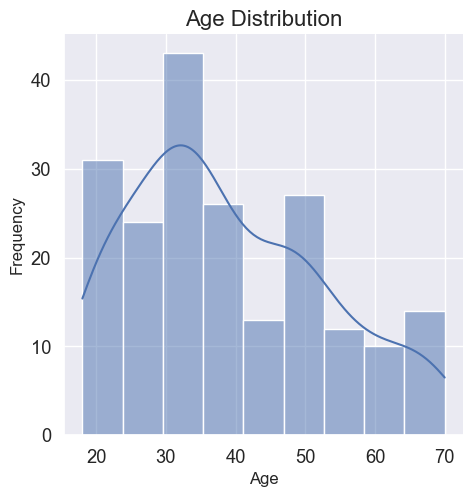

In [11]:
# distribution of age
sns.displot(x='Age', data=df, kde=True)
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

* No outliers in Age column.
* As seen in the chart: right-skewed distribution in age and the mean is greater than the median.

In [12]:
# unique values for spending score
df['Score'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

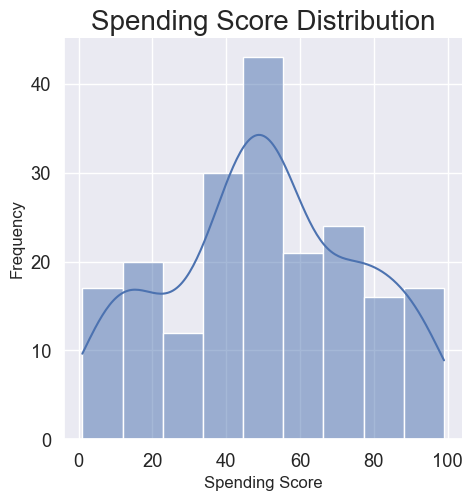

In [13]:
# distribution of spending score
sns.displot(x='Score', data=df, kde=True)
plt.title("Spending Score Distribution", fontsize=20)
plt.xlabel("Spending Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

No outliers in Spending score column

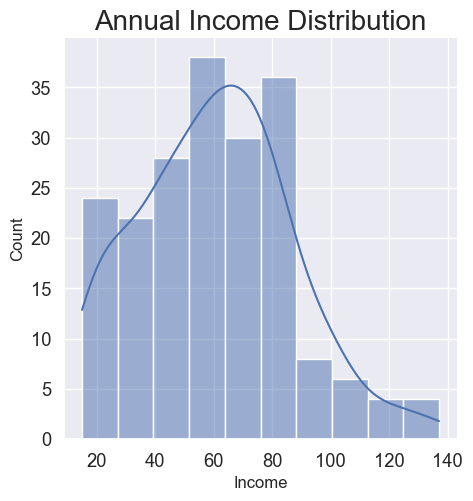

In [14]:
# distribution of annual income
sns.displot(x='Income', data=df, kde=True)
plt.title("Annual Income Distribution", fontsize=20)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

There are outliers in Annual income.

In [15]:
## replace outliers with median value 
df.loc[df["Income"]>130, "Income"] = df["Income"].median()

In [16]:
# proportion of gender column 
gender_count = df["Gender"].value_counts(normalize=True)
gender_count.to_frame()

,Gender
Female,0.56
Male,0.44


* Percentage of female customers: 56%
* Percentage of female customers: 44%

<Axes: xlabel='Gender', ylabel='count'>

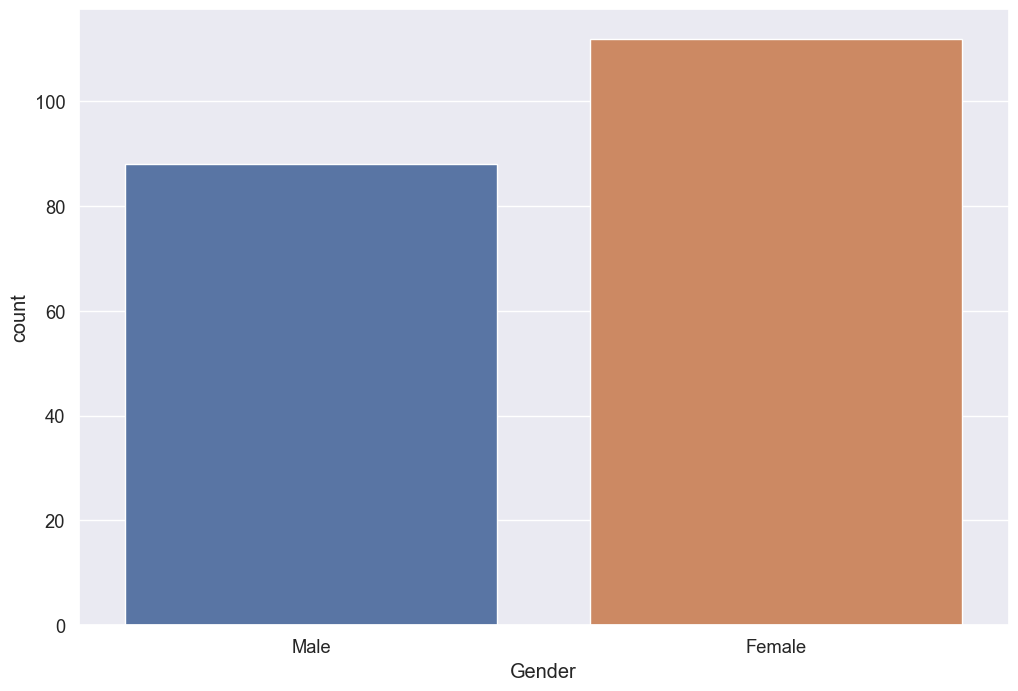

In [17]:
# distribution of categorical variable
sns.countplot(x='Gender', data=df)

In [18]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<Axes: >

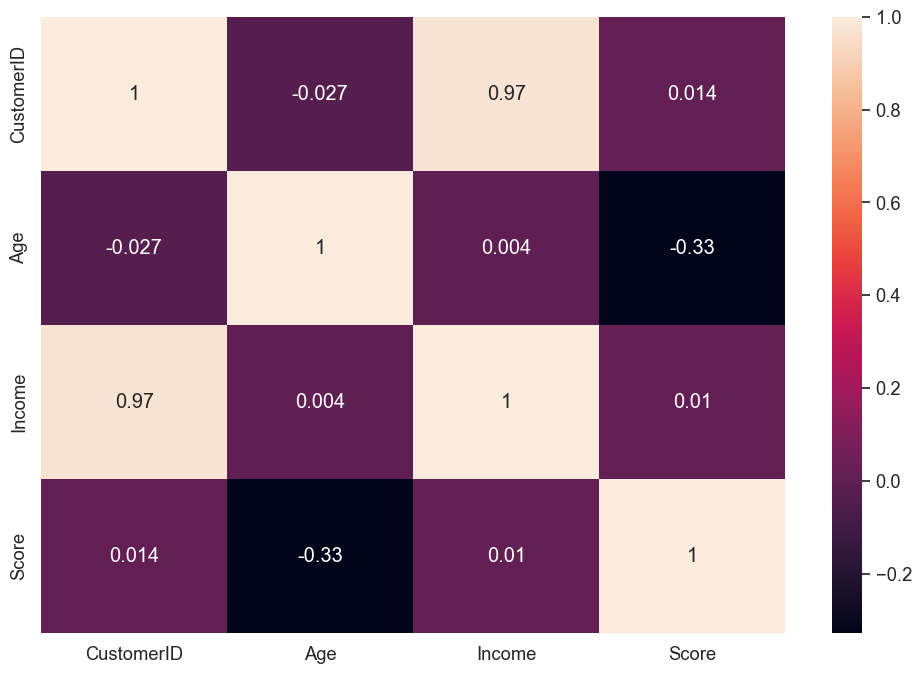

In [19]:
sns.heatmap(df.corr(), annot=True)

## Data Cleaning

### Feature Engineering

In [20]:
# drop CustomerID as it is not useful
df.drop('CustomerID', axis=1, inplace=True)

In [21]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15.0,39
1,Male,21,15.0,81
2,Female,20,16.0,6
3,Female,23,16.0,77
4,Female,31,17.0,40


## Data Preprocessing For ML Model

In [22]:
numerical_columns = df.select_dtypes(include="number").columns.to_list() ## select numerical cols 
categorical_columns = df.select_dtypes(exclude="number").columns.to_list()

print(f"numerical columns in data is : {numerical_columns}")
print(f"categorical columns in data is : {categorical_columns}")

numerical columns in data is : ['Age', 'Income', 'Score']
categorical columns in data is : ['Gender']


### Standardization

In [23]:
scaler = StandardScaler() ## Create an instance of StandardScaler
scaler.fit(df[numerical_columns]) ## 'numerical_columns' is a list of numerical column names
scaled_data = scaler.transform(df[numerical_columns])# Transform the numerical columns using the scaler
scaled_data = pd.DataFrame(scaled_data, columns=numerical_columns)

In [24]:
scaled_data

,Age,Income,Score
0,-1.424569,-1.788777,-0.434801
1,-1.281035,-1.788777,1.195704
2,-1.352802,-1.748853,-1.715913
3,-1.137502,-1.748853,1.040418
4,-0.563369,-1.708930,-0.395980
...,...,...,...
195,-0.276302,2.403201,1.118061
196,0.441365,2.642742,-0.861839
197,-0.491602,2.642742,0.923953
198,-0.491602,0.067670,-1.250054


### Label Encoding

In [25]:
le = LabelEncoder() ## Create an instance of LabelEncoder
## Fit the encoder
le.fit(df[categorical_columns]) ## 'categorical_columns' is a list of categorical column names
df["Encoded Gender"] = le.transform(df[categorical_columns]) ## # Transform the categorical columns using the encoder

In [26]:
df.drop(columns=["Gender", "Age", "Income", "Score"], axis=True, inplace=True)

In [27]:
df_final = pd.concat([df, scaled_data], axis=1) ## concat endcoding column and scaled data
df_final

,Encoded Gender,Age,Income,Score
0,1,-1.424569,-1.788777,-0.434801
1,1,-1.281035,-1.788777,1.195704
2,0,-1.352802,-1.748853,-1.715913
3,0,-1.137502,-1.748853,1.040418
4,0,-0.563369,-1.708930,-0.395980
...,...,...,...,...
195,0,-0.276302,2.403201,1.118061
196,0,0.441365,2.642742,-0.861839
197,1,-0.491602,2.642742,0.923953
198,1,-0.491602,0.067670,-1.250054


## Modeling

In [28]:
training_data = df_final[["Income","Score"]]

In [29]:
kmeans = KMeans(
    n_clusters=2, n_init=10, random_state=42) ## Create instance
kmeans.fit(training_data) ## Fit the KMeans model to the data

KMeans(n_clusters=2, n_init=10, random_state=42)

The kmeans.inertia_ : attribute in scikit-learn's KMeans class represents the sum of squared distances of samples to their closest cluster center. It is a measure of how well the samples in the dataset are clustered around their respective cluster centroids.

In [30]:
kmeans.inertia_

267.6535627144873

In [31]:
# See the Labels
customer_labels = kmeans.labels_
customer_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

### Elbow Method

In [32]:
# Using the elbow method to find the optimal number of clusters
k_choose = np.arange(2, 12, 1)
k_with_inertia = {}

for k in k_choose:
    each_kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    each_kmeans.fit(training_data)
    
    ## Get interia
    k_with_inertia[k] = each_kmeans.inertia_


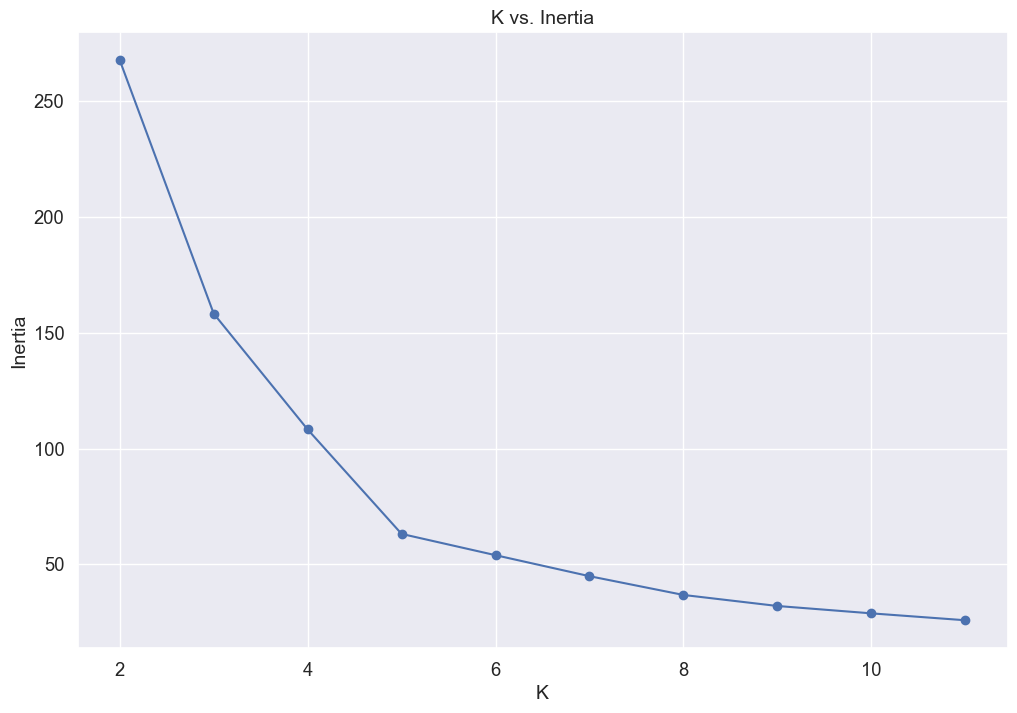

In [33]:
## Draw to get the best value for k 

plt.plot(k_with_inertia.keys(), k_with_inertia.values(), 'bo-')
plt.title('K vs. Inertia', fontsize=14)
plt.xlabel('K', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.show()   ## optimal according to elbow method that k=5

optimal according to elbow method that k=5

### Retrain KMeans Algorithm with Optimal Value of K

In [34]:
kmeans = KMeans(
    n_clusters=5, n_init=10, random_state=42) ## Create instance
kmeans.fit(training_data) ## Fit the KMeans model to the data

KMeans(n_clusters=5, n_init=10, random_state=42)

In [35]:
kmeans.inertia_

63.138175098564076

In [37]:
cust_labels_new = kmeans.labels_
cust_labels_new

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [38]:
np.unique(cust_labels_new) ## 5 cluster

array([0, 1, 2, 3, 4])

In [39]:
cluster_centroids = kmeans.cluster_centers_ ## cluster centroids

In [41]:
df_kmeans = pd.DataFrame(np.c_[training_data, cust_labels_new],
                         columns=training_data.columns.tolist()+['cluster_no'])
df_kmeans

,Income,Score,cluster_no
0,-1.788777,-0.434801,3.0
1,-1.788777,1.195704,1.0
2,-1.748853,-1.715913,3.0
3,-1.748853,1.040418,1.0
4,-1.708930,-0.395980,3.0
...,...,...,...
195,2.403201,1.118061,4.0
196,2.642742,-0.861839,2.0
197,2.642742,0.923953,4.0
198,0.067670,-1.250054,2.0


### Visualize Clusters

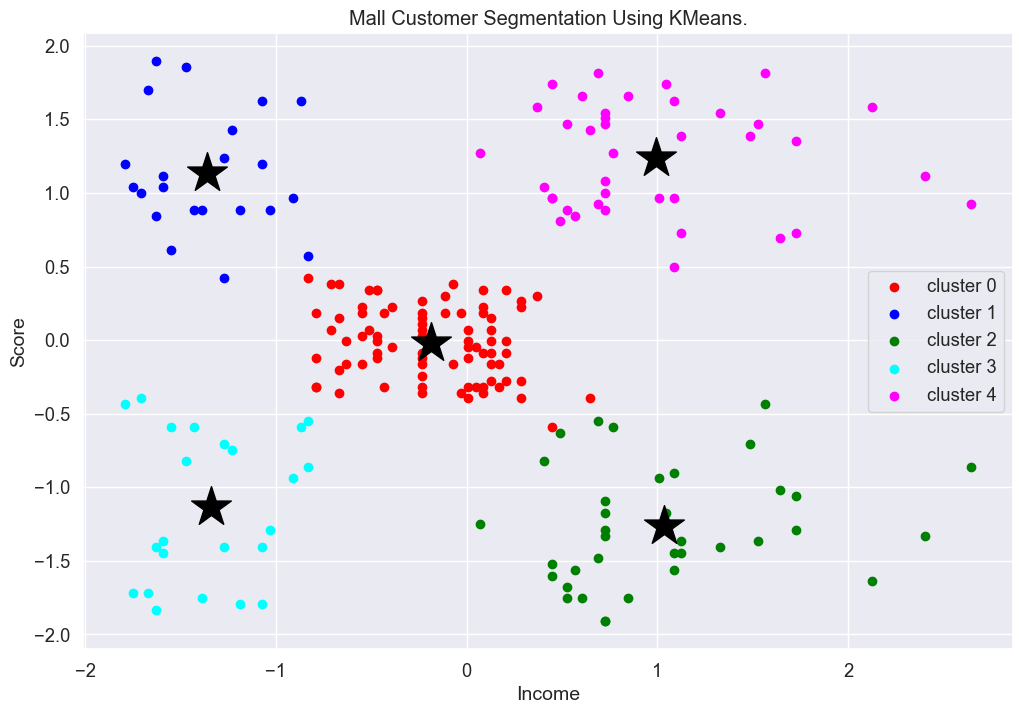

In [42]:
## To visualize using cluster number as a legned
plt.scatter(df_kmeans[df_kmeans['cluster_no']==0]['Income'],
            df_kmeans[df_kmeans['cluster_no']==0]['Score'], c='red', label='cluster 0')
plt.scatter(df_kmeans[df_kmeans['cluster_no']==1]['Income'],
            df_kmeans[df_kmeans['cluster_no']==1]['Score'], c='blue', label='cluster 1')
plt.scatter(df_kmeans[df_kmeans['cluster_no']==2]['Income'],
            df_kmeans[df_kmeans['cluster_no']==2]['Score'], c='green', label='cluster 2')
plt.scatter(df_kmeans[df_kmeans['cluster_no']==3]['Income'],
            df_kmeans[df_kmeans['cluster_no']==3]['Score'], c='cyan', label='cluster 3')
plt.scatter(df_kmeans[df_kmeans['cluster_no']==4]['Income'],
            df_kmeans[df_kmeans['cluster_no']==4]['Score'], c='magenta', label='cluster 4')

## for centroids
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='*', c='black', s=900)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title("Mall Customer Segmentation Using KMeans.")
plt.legend(loc='best')
plt.show()

### Customer Segments:

The KMeans clustering identifies five distinct customer segments in the mall, each with unique characteristics. The centroids, represented by stars, provide insights into these segments.

* Cluster 0: (High Income, High Score)
This cluster consists of customers with high income and high scores, likely representing your most valuable customers. They might be interested in high-end products and services, and marketing efforts should focus on promoting exclusive offers and experiences.

* Cluster 1: (High Income, Low Score)
Customers in this group have high income but give low scores, indicating potential dissatisfaction despite their purchasing power. Marketing efforts should focus on addressing their concerns, improving the customer experience at higher-end stores, and understanding their specific needs.

* Cluster 2: (Low Income, High Score)
This cluster comprises customers with low income but high scores, suggesting their satisfaction despite affordability constraints. Marketing campaigns should promote value-driven offerings and loyalty programs to encourage repeat visits and increased spending.

* Cluster 3: (Low Income, Low Score)
Customers in this group have both low income and low scores, presenting a challenge for targeted marketing. Understanding their needs and preferences through further research is crucial to develop effective strategies.

* Cluster 4: (Mid-Range Income, Mid-Range Score)
This cluster represents customers with average income and scores, suggesting a potential mix of interests and preferences. Tailored marketing campaigns with diverse offerings, addressing both value and experience, could be effective for this group.

### Target Customers:

Identifying the most valuable target segments depends on the specific business goals. While Cluster 0 presents high-value potential, other clusters might offer considerable opportunities.

### Strategic Targeting:

* Cluster 0: High-end offerings, VIP experiences, exclusive discounts.
* Cluster 1: Personalized communication, address specific concerns, improve higher-end experience.
* Cluster 2: Value-driven promotions, loyalty programs, budget-friendly options.
* Cluster 3: Further research to understand needs and preferences, targeted campaigns based on findings.
* Cluster 4: Diverse offerings catering to both value and experience seekers, personalized recommendations.

Overall:

The KMeans clustering provides valuable insights into customer segments, enabling the mall to tailor its marketing strategies for each group. This approach can maximize customer value and achieve business goals.